# Regression and Other Stories: Simulation
Simulation of probability models. See Chapter 5 in Regression and Other Stories.

In [1]:
import arviz as az
from bambi import Model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


### Simulate how many girls in 400 births?

In [2]:
n_girls = stats.binom(400, .488).rvs(1)
print(n_girls)

[193]


### Repeat simulation 1000 times

In [3]:
# With scipy.stats we do not need a loop to conduct 1000 simulations, but instead can specify it by changing the argument
# to rvs
n_sims = 1000
n_girls = stats.binom(400, .488).rvs(n_sims)

### Plot

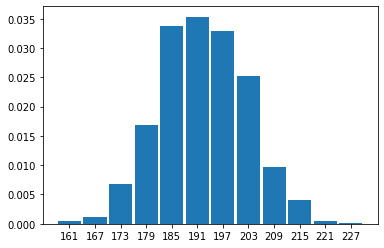

In [4]:
az.plot_dist(n_girls);

### Accounting for twins

In [5]:
birth_types = pd.Series(["fraternal twin","identical twin","single birth"]) \
.sample(n=400,replace=True, weights=(1/125, 1/300, 1-1/125-1/300))

birth_types.value_counts()

single birth      396
identical twin      3
fraternal twin      1
dtype: int64

### Plot

In [6]:
# For this smaller dataset we'll use pandas apply. For seriously large datasets consider ufuncs or other optimizations
# outside of the scope of this

def birthtype(birth_type):
    if birth_type == "single birth":
        counts = stats.binom(1, 0.488).rvs(1)
    elif birth_type == "identical twin":
        counts = 2*stats.binom(1, 0.495).rvs(1)
    elif birth_type == "fraternal twin":
        counts = stats.binom(2, 0.495).rvs(1)
    return counts.squeeze()

girls = birth_types.apply(birthtype)
girls.head()

2    0
2    0
2    0
2    0
2    0
dtype: int64

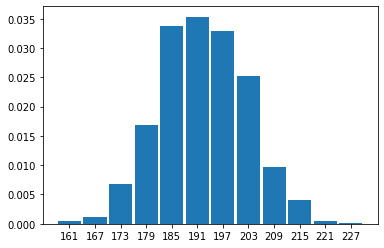

In [7]:
az.plot_dist(n_girls, kind="hist");

### Simulation of continuous and mixed discrete/continuous models

In [8]:
n_sims = 1000
y1 = stats.norm(3, .5).rvs(n_sims)
y2 = np.exp(y1)
y3 = stats.binom(20, .6).rvs(n_sims)
y4 = stats.poisson(5).rvs(n_sims)

### Plot

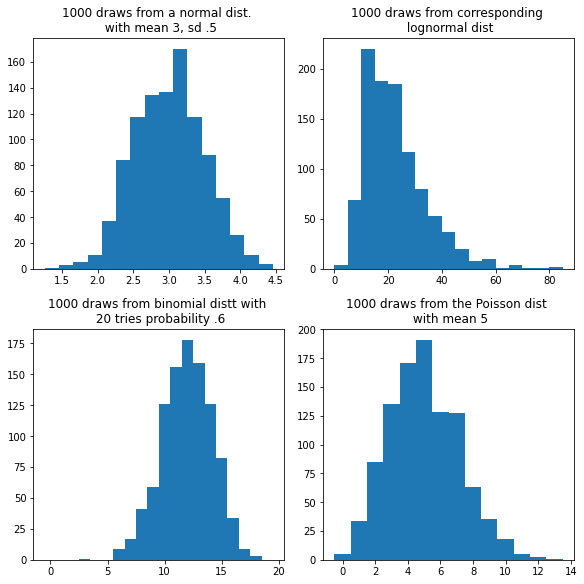

In [9]:
fig, axes = plt.subplots(2,2, figsize=(8,8), constrained_layout=True)
axes[0][0].hist(y1, bins = np.arange(y1.min(), y1.max() + .2, .2))
axes[0][0].set_title("1000 draws from a normal dist. \n with mean 3, sd .5")

axes[0][1].hist(y2, bins = np.arange(0, y2.max() + 5, 5))
axes[0][1].set_title("1000 draws from corresponding \n lognormal dist")


axes[1][0].hist(y3, bins = np.arange(-.5, 20.5, 1))
axes[1][0].set_title("1000 draws from binomial distt with \n 20 tries probability .6")

axes[1][1].hist(y4, bins = np.arange(-.5, y4.max() + 1, 1))
axes[1][1].set_title("1000 draws from the Poisson dist \n with mean 5");

### Generate the height of one randomly chosen adult

In [10]:
male = stats.binom(1, .48).rvs(1)
height = np.where(male ==1, stats.norm(69.1, 2.9).rvs(1), stats.norm(63.7, 2.7).rvs(1))

male, height

(array([0]), array([64.58701554]))

### Select 10 adults at random

In [11]:
N = 10

male = stats.binom(1, .48).rvs(N)
height = np.where(male==1, stats.norm(69.1, 2.9).rvs(N), stats.norm(63.7, 2.7).rvs(N))
avg_height = height.mean()
avg_height

66.5041557411953

### Repeat the simulation 1000 times

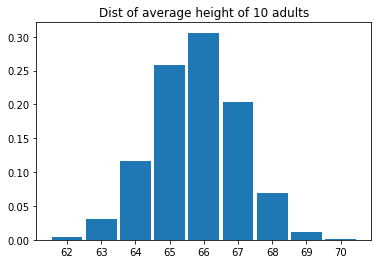

In [12]:
n_sims = 1000
avg_height = np.empty(n_sims)

for i in range(n_sims):
    N=10
    male = stats.binom(1, .48).rvs(N)
    height = np.where(male==1, stats.norm(69.1, 2.9).rvs(N), stats.norm(63.7, 2.7).rvs(N))
    avg_height[i] = height.mean()
    
ax = az.plot_dist(avg_height, kind="hist")
ax.set_title("Dist of average height of 10 adults");

### The maximum height of the 10 people

In [15]:
def height_sim(n):
    male = stats.binom(1, .48).rvs(N)
    height = np.where(male==1, stats.norm(69.1, 2.9).rvs(N), stats.norm(63.7, 2.7).rvs(N))
    max_height = height.max()
    return max_height

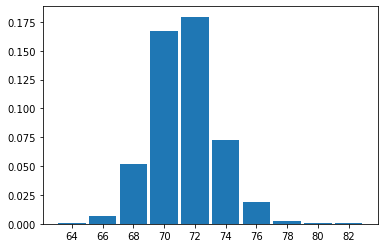

In [16]:
max_height = np.array([height_sim(10) for _ in range(1000)])
az.plot_dist(max_height, kind="hist");